In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore') 

## Loading the dataset

In [2]:
# creating database connection
conn  = sqlite3.connect('inventory.db')

# fetching vendor summary data
df  = pd.read_sql_query("select * from vendor_sales_summary" , conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,totalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
df.to_csv("vendor_sales_summary.csv")

In [4]:
df['Brand'].nunique()

10663

In [5]:
df['Volume'].unique()

array([ 1750. ,   750. ,  1000. ,  1500. ,   375. ,    50. ,  3000. ,
        5000. ,   100. ,   200. ,  4000. ,   187. ,   500. ,   600. ,
         300. ,  1100. ,   250. ,   400. , 18000. ,   150. ,   720. ,
         330. ,   162.5,   180. , 19500. ,  6000. ,   560. , 20000. ,
        9000. ,  3750. ,   650. ])

In [6]:
df.shape

(10692, 18)

In [7]:
df1 = pd.read_sql_query("select VendorName , count(Brand) from vendor_sales_summary group by VendorName" , conn)
df1

,VendorName,count(Brand)
0,AAPER ALCOHOL & CHEMICAL CO,1
1,ADAMBA IMPORTS INTL INC,3
2,ALISA CARR BEVERAGES,13
3,ALTAMAR BRANDS LLC,2
4,AMERICAN SPIRITS EXCHANGE,2
...,...,...
123,WEIN BAUER INC,6
124,WESTERN SPIRITS BEVERAGE CO,17
125,WILLIAM GRANT & SONS INC,81
126,WINE GROUP INC,201


## EDA on Our Final Datasets

In [8]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


### Analysis from df.describe
Mean Sales ($42,239) is higher than Mean Purchases ($30,107) — expected in profitable businesses.
2. GrossProfit:
Mean = $12,132, max = $1.29M, but note min = -$52,002.78 → you’re losing money on some transactions.
25th percentile = only $52, which may suggest many low-margin products or data skewed by high-profit outliers.

3. ProfitMargin:
Issues: Mean = -inf, std = NaN, min = -inf

Indicates division by zero errors (likely when TotalSalesDollars = 0)

You should clean rows where sales = 0 before analyzing margins.
4. Stock Turnover
Mean = 1.71, Max = 274.5

High max shows some products are selling very fast → identify top performers.

Low 25% percentile (~0.8) indicates slow movers or dead stock.




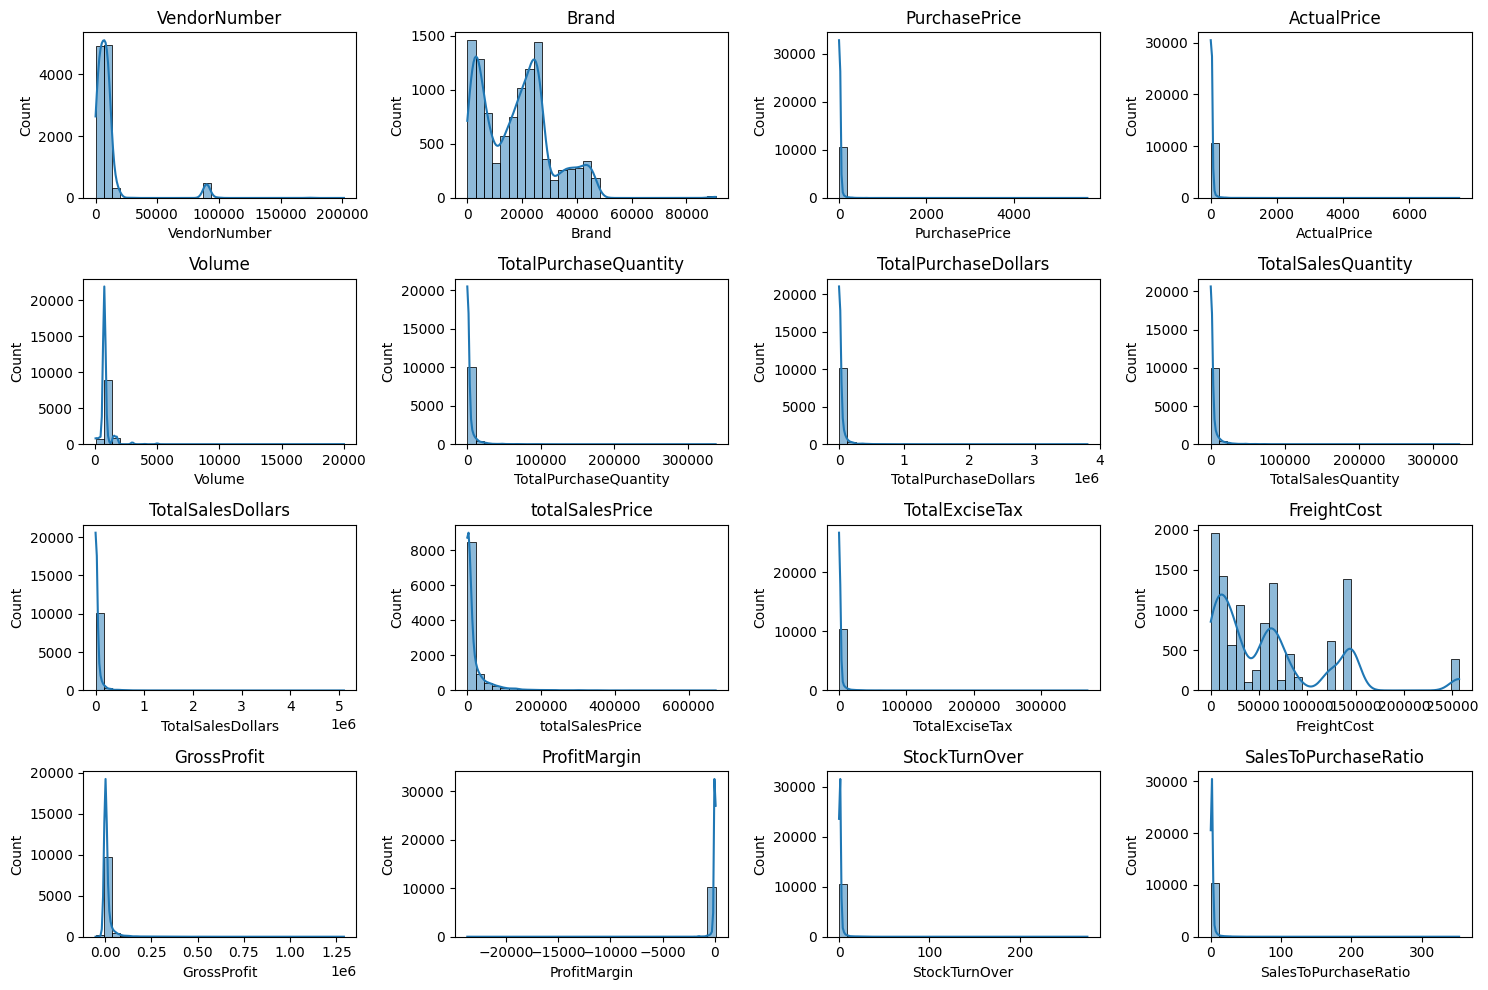

In [9]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include = np.number).columns
plt.figure(figsize = (15 , 10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4 , 4  , i+1)
    sns.histplot(df[col] , kde = True , bins  = 30)
    plt.title(col)
    
plt.tight_layout()    
plt.show()


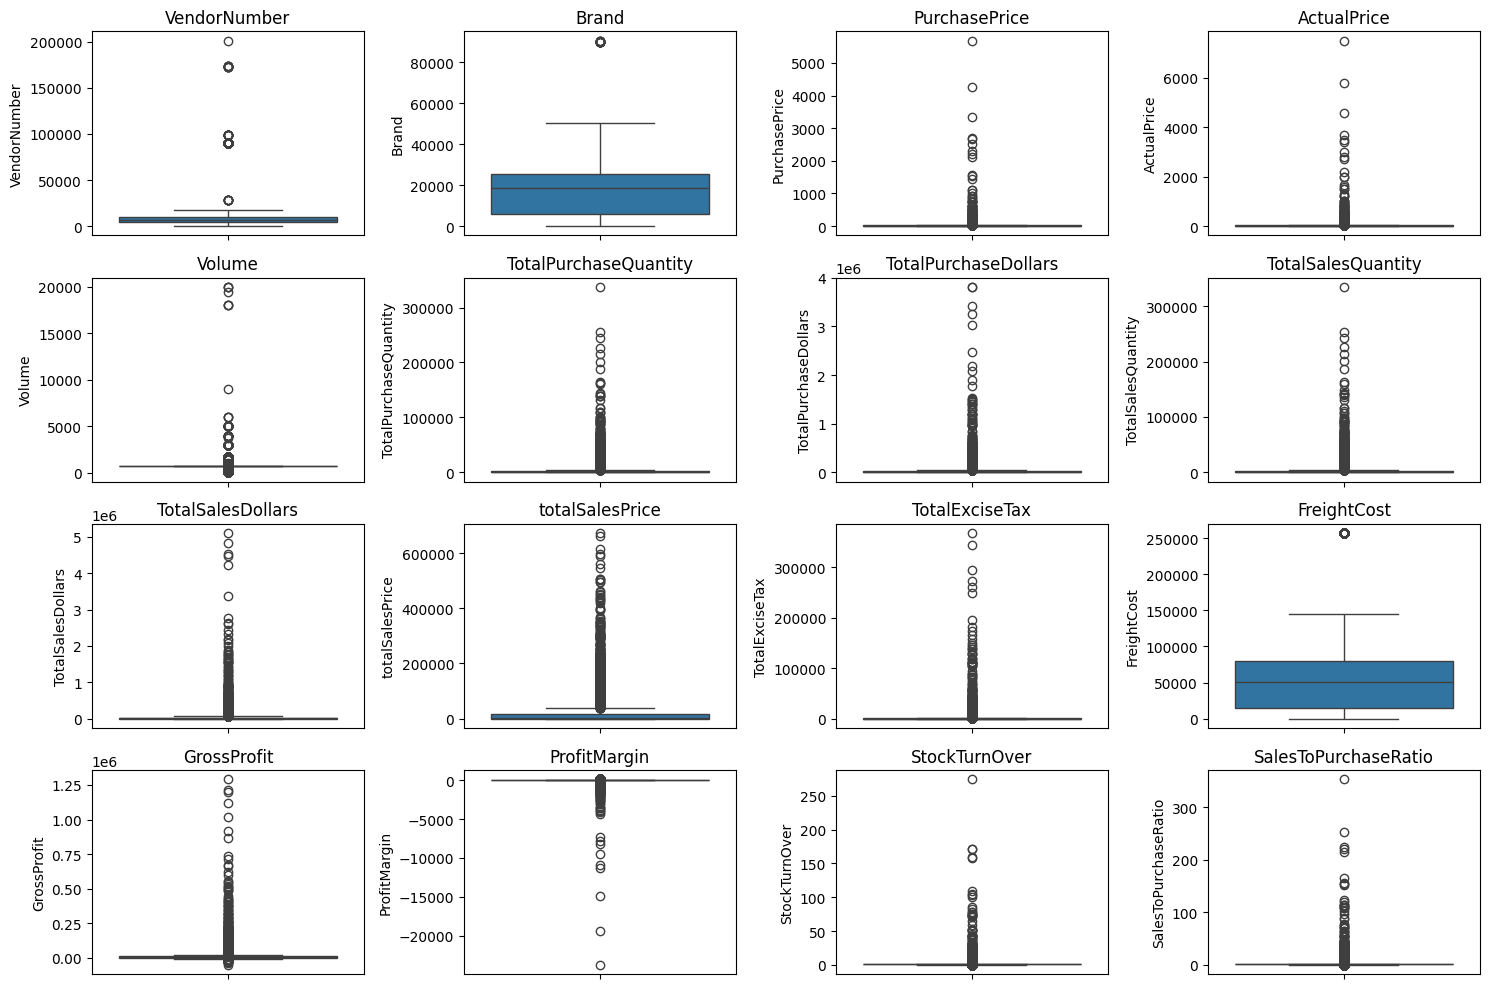

In [10]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include = np.number).columns
plt.figure(figsize = (15 , 10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4 , 4  , i+1)
    sns.boxplot(df[col])
    plt.title(col)
    
plt.tight_layout()    
plt.show()


In [11]:
df = pd.read_sql_query("""
                       select * from vendor_sales_summary where GrossProfit > 0 And ProfitMargin > 0 
                       And TotalSalesQuantity > 0"""
                         , conn)

In [12]:
df.shape

(8564, 18)

In [13]:
df['Description'].nunique()

7707

In [14]:
df.head(1)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,totalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.6,142049.0,5101919.51,672819.31,260999.2,68601.68,1290667.91,25.297693,0.979108,1.338647


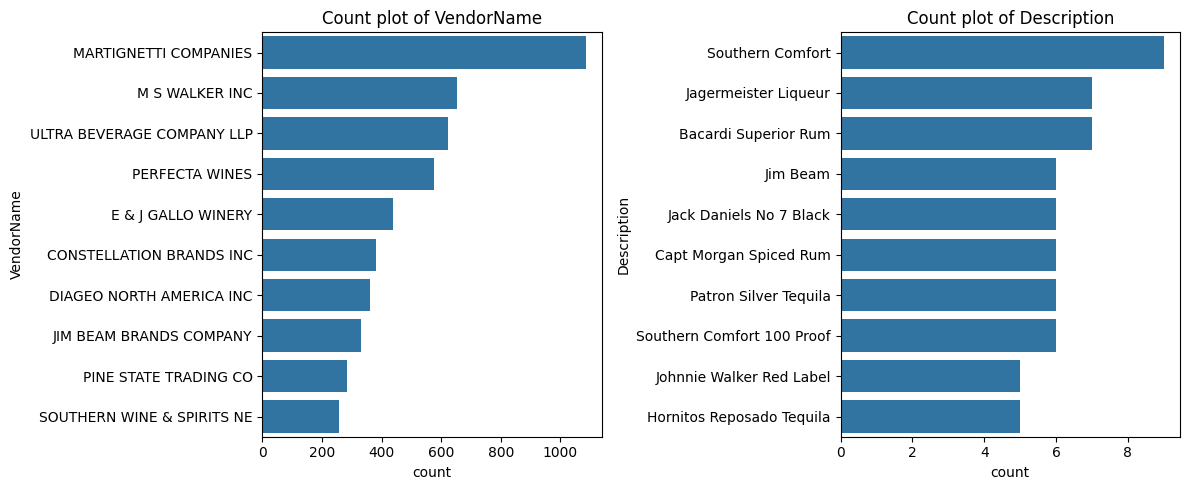

In [15]:
# count plot for categorical
categorical_columns = ['VendorName'  , 'Description']
plt.figure(figsize = (12 , 5))
for i , col in enumerate(categorical_columns):
    plt.subplot(1 , 2, i+1)
    sns.countplot(y = df[col] , order = df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")

plt.tight_layout()    
plt.show()

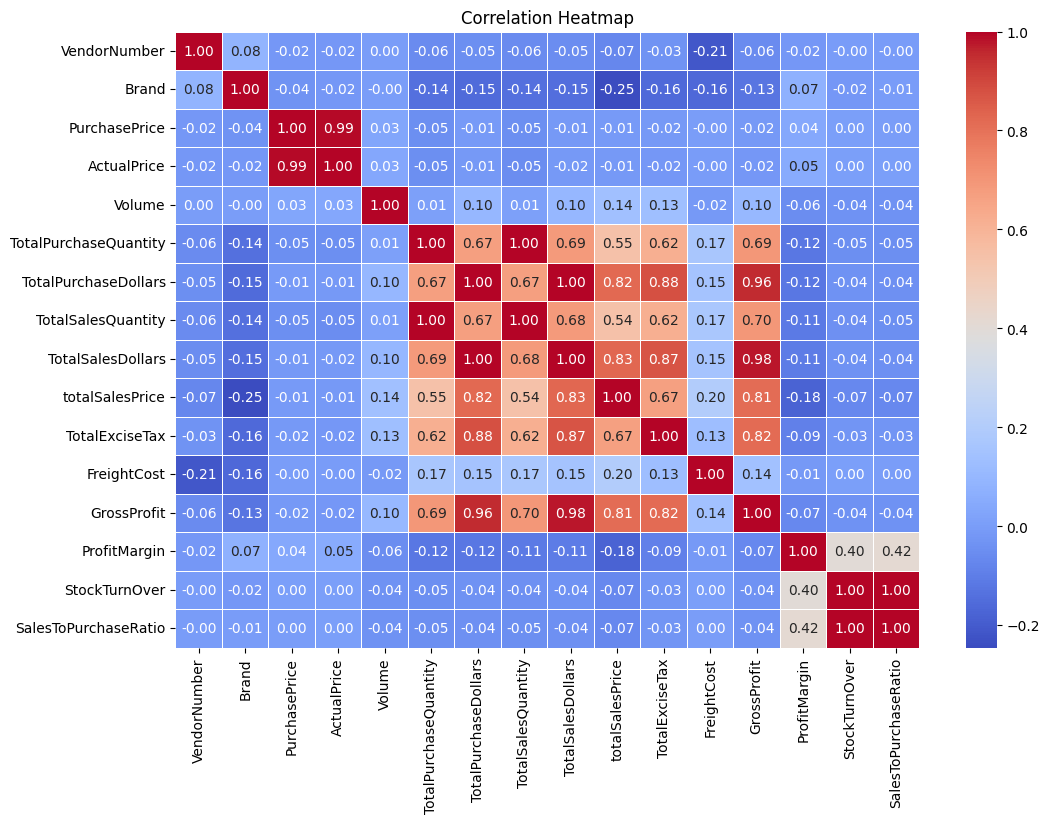

In [16]:
# correlatio Heatmap
plt.figure(figsize = (12 , 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix , annot = True , fmt = ".2f" , cmap = "coolwarm" , linewidths  = 0.5)
plt.title("Correlation Heatmap")
plt.show()


# Correlation Insights
> PurchasePrice has weak correlation with TotalSalesDollars (-0.012) and GrossProfit (-0.016) , suggesting that price variations do not significatilly impact sales revenue or profit

> Strong correlation between total purchase quantity and total sales quantity (0.999) , confirming efficient inventory turnover.& total sale price (-0.179) suggest that as sales price increase , margin decrease , possibly due to competitive
pricing pressures

> StockTurnOver has weak negative correlation with both GrossProfit (-0.038) and ProfitMargin (-0.055) , indicating that faster turnover doest not necessarily result in higher Profitability.

#### Question 1.
Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher Profit margins

In [17]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [18]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [19]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)


In [20]:
low_sales_threshold

np.float64(560.299)

In [21]:
high_margin_threshold

np.float64(64.97017552750113)

In [22]:
# filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold)&
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
    
]
print("brand with Low Slaes but high Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

brand with Low Slaes but high Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [23]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # better visualization


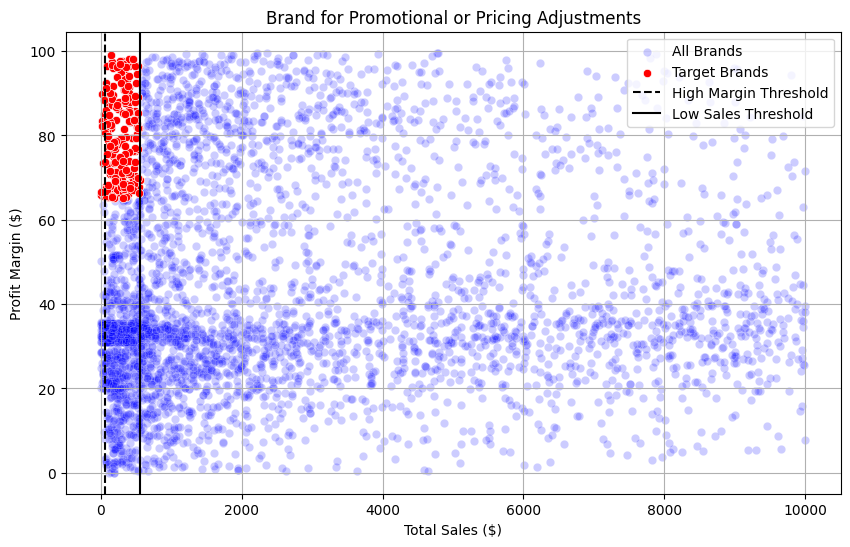

In [24]:
plt.figure(figsize = (10 , 6))
sns.scatterplot(data = brand_performance , x = 'TotalSalesDollars' , y = 'ProfitMargin' , color = 'blue' , label = 'All Brands' , alpha = 0.2)
sns.scatterplot(data = target_brands , x = 'TotalSalesDollars' , y = 'ProfitMargin' , color = 'red' , label = 'Target Brands')

plt.axvline(high_margin_threshold, linestyle  = '--' , color = 'black' , label = 'High Margin Threshold')
plt.axvline(low_sales_threshold , linestyle  = '-' , color = 'black' , label = 'Low Sales Threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin ($)")
plt.title("Brand for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


### Question 2.
which vendor and brands demonstrate the highest Sales performance ?

In [25]:
top_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands= df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [26]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [27]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000: .2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [28]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black     7.96M
Tito's Handmade Vodka       7.40M
Grey Goose Vodka            7.21M
Capt Morgan Spiced Rum      6.36M
Absolut 80 Proof            6.24M
Jameson Irish Whiskey       5.72M
Ketel One Vodka             5.07M
Baileys Irish Cream         4.15M
Kahlua                      3.60M
Tanqueray                   3.46M
Name: TotalSalesDollars, dtype: object

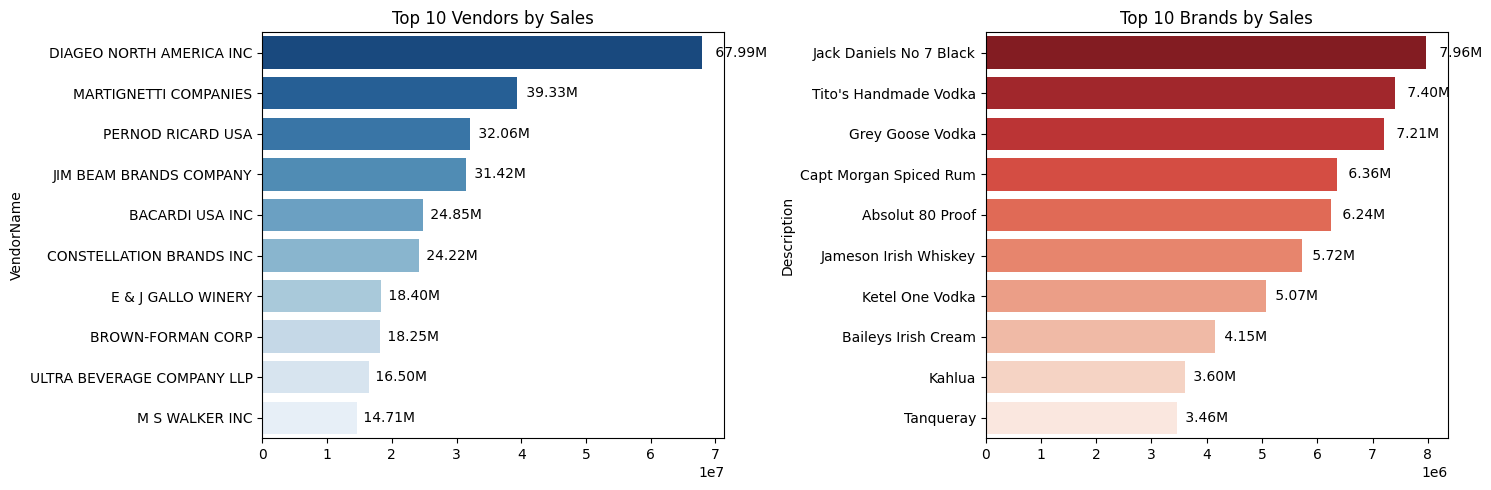

In [29]:
plt.figure(figsize = (15 , 5))

#plot for top Vendors
plt.subplot(1 , 2 , 1)
ax1 = sns.barplot(y = top_vendors.index , x  = top_vendors.values , palette = "Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha = 'left' , va = 'center' , fontsize  =10 , color = 'black')

#plot for Top Brands
plt.subplot(1 , 2, 2)    
ax2 = sns.barplot(y = top_brands.index.astype(str) , x = top_brands.values , palette = "Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha  = 'left' , va = 'center' , fontsize = 10 , color = 'black')

plt.tight_layout()    
plt.show()

### Question 3.
Which Vendor Contribute the most to total purchase dollars ?

In [30]:
vendor_performance = df.groupby('VendorName').agg(
    {
        'TotalPurchaseDollars':'sum',
        'GrossProfit':'sum',
        'TotalSalesDollars':'sum'
    }
).reset_index()

In [31]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [32]:
vendor_performance['PurchaseContribution%'] = (vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum())*100

In [33]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008362
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.013892
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097097
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.912074
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,1.693183


In [34]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%' , ascending  =  False) , 2)

In [35]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [36]:
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [37]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


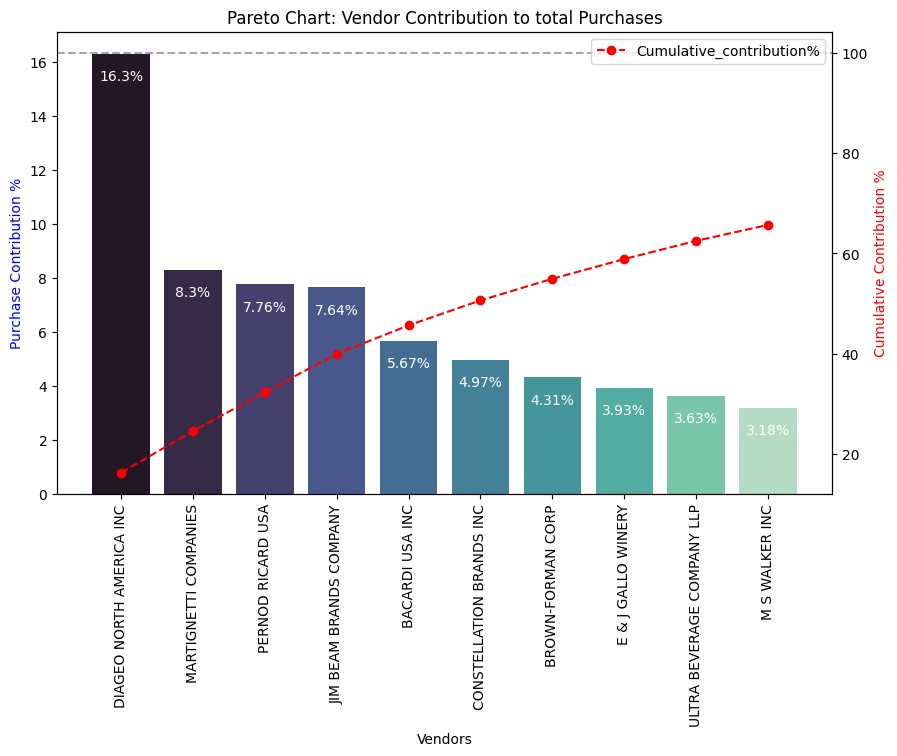

In [40]:
fig , ax1  = plt.subplots(figsize = (10 , 6))

sns.barplot(x = top_vendors['VendorName'] , y = top_vendors['PurchaseContribution%'] , palette = 'mako' , ax = ax1)


for i , value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value-1 , str(value)+'%' , ha = 'center' , fontsize = 10 , color = 'white' )
    

ax2 = ax1.twinx()    
ax2.plot(top_vendors['VendorName'] , top_vendors['Cumulative_Contribution%'] , color=  'red' , marker  = 'o' , linestyle = 'dashed' , label = 'Cumulative_contribution%')

ax1.set_xticklabels(top_vendors['VendorName'] , rotation = 90)
ax1.set_ylabel('Purchase Contribution %' , color = 'blue')
ax2.set_ylabel('Cumulative Contribution %'  , color  = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to total Purchases')

ax2.axhline(y=100 , color = 'gray' , linestyle = 'dashed' , alpha = 0.7)
ax2.legend(loc = 'upper right')
plt.show()

### Question 4.
how much of total procurement is dependent on the top vendors ?

In [41]:
print(f"Total Purchase Contribution of top 10 vendor is {round(top_vendors['PurchaseContribution%'].sum() , 2)}%")

Total Purchase Contribution of top 10 vendor is 65.69%


Text(0.5, 1.0, "Top 10 ventor's Purchase Contribution (%)")

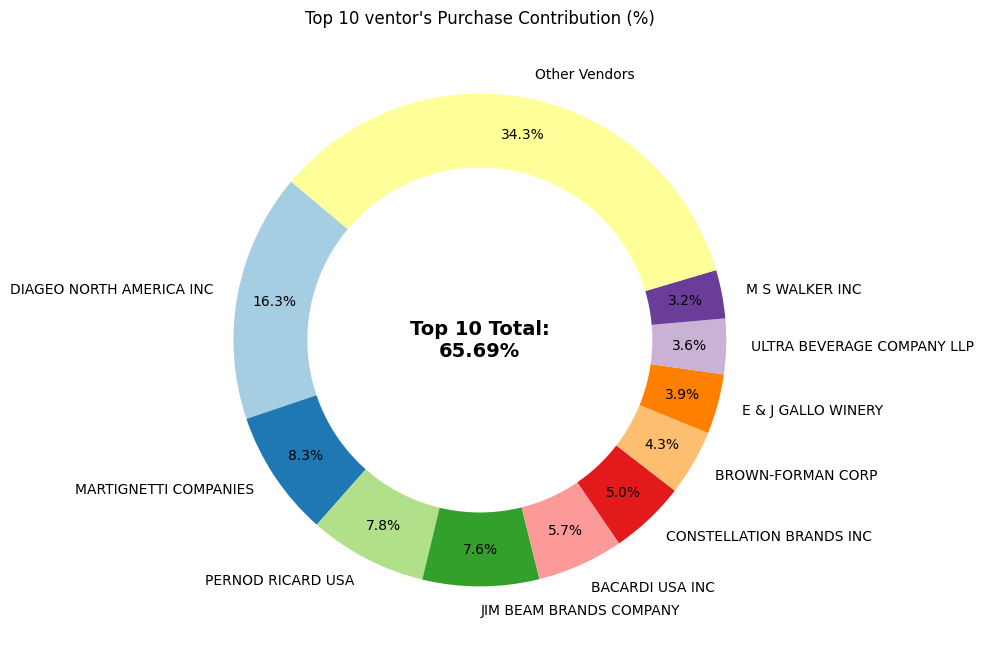

In [44]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

#Append Other Vendor category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut CHart
fig , ax  = plt.subplots(figsize = (8 , 8))
wedges , texts , autotexts = ax.pie(purchase_contributions , labels = vendors , autopct = '%1.1f%%' ,
                                    startangle =140 , pctdistance = 0.85 , colors = plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
center_circle = plt.Circle((0 , 0) , 0.70 , fc = 'white')
fig.gca().add_artist(center_circle)

# Add Total Contribution annotation int the center
plt.text(0 , 0 , f"Top 10 Total:\n{total_contribution:.2f}%" , fontsize = 14 , fontweight = 'bold' ,
         ha = 'center' , va  = 'center')
plt.title("Top 10 ventor's Purchase Contribution (%)")


In [45]:
df.head(2)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,totalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


### Question 5.
Does Purchasing in bulk reduce the unit Price and What is the optimal Purchase Volume for cost savings ?


In [49]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [50]:
df['UnitPurchasePrice']

0       26.27
1       23.19
2       18.24
3       16.17
4       21.89
        ...  
8559     1.32
8560     0.39
8561     0.74
8562     1.47
8563     0.71
Name: UnitPurchasePrice, Length: 8564, dtype: float64

In [51]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'] , q =  3 , labels = ['Small' , 'Mediam' , 'Large'])

In [52]:
df['OrderSize']


0       Large
1       Large
2       Large
3       Large
4       Large
        ...  
8559    Small
8560    Small
8561    Small
8562    Small
8563    Small
Name: OrderSize, Length: 8564, dtype: category
Categories (3, object): ['Small' < 'Mediam' < 'Large']

In [53]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Mediam,15.486414
Large,10.777625


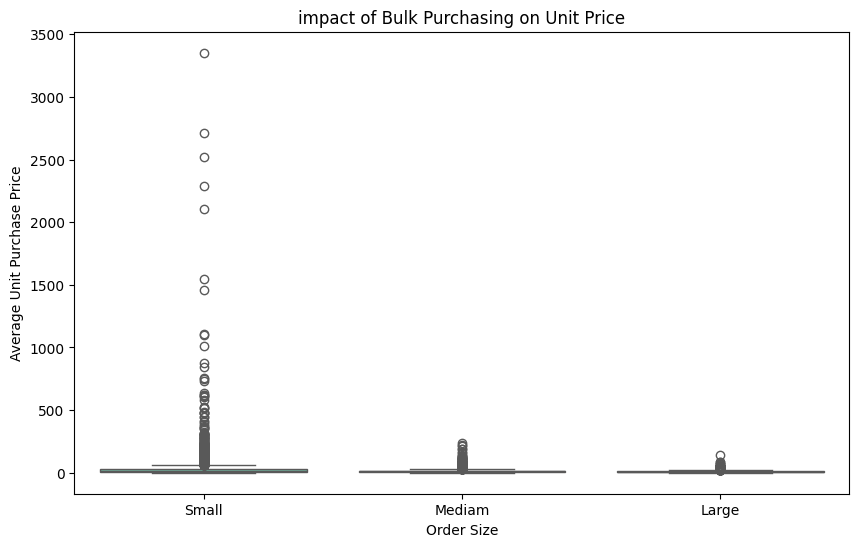

In [54]:
plt.figure(figsize = (10 , 6))
sns.boxplot(data = df , x = "OrderSize" , y = 'UnitPurchasePrice' , palette = 'Set2')
plt.title("impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

### Question 6.
Which vendor have low inventory turnover, indicating excess stock and slow-moving Product ?

In [55]:
df.head(2)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,totalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio,OrderSize,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,Large,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,Large,23.19


In [56]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values(by = 'StockTurnOver' , ascending=True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [57]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:' , format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital:  2.71M


In [58]:
inventory_value_per_vendor = df.groupby("VendorName")['UnsoldInventoryValue'].sum().reset_index()
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = "UnsoldInventoryValue" , ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### Question 7.
What is the 95% confidence interval for profit margin of top-performing and low - performing vendors


In [59]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [60]:
top_vendors = df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"]<=low_threshold]["ProfitMargin"].dropna()


In [61]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [62]:
def confidence_interval(data , confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data , ddof = 1)/np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence)/2 , df  = len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val , mean_val - margin_of_error , mean_val + margin_of_error

Top Vendors 95% CI: (30.74 , 31.61) , Mean:31.18
Low Vendors 95% CI: (40.50 , 42.64 , Mean:41.57)


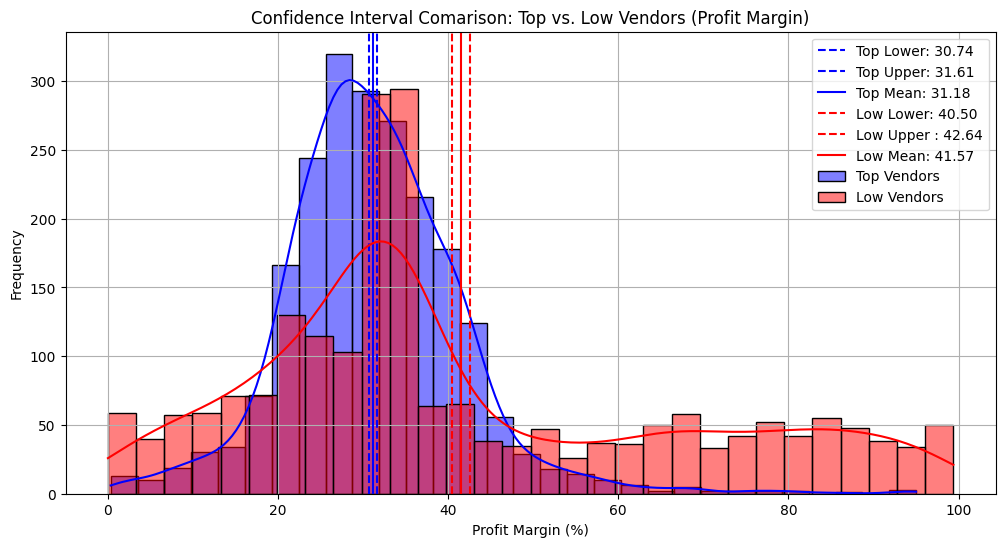

In [63]:
top_mean , top_lower , top_upper = confidence_interval((top_vendors))
low_mean , low_lower , low_upper = confidence_interval((low_vendors))

print(f"Top Vendors 95% CI: ({top_lower:.2f} , {top_upper:.2f}) , Mean:{top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f} , {low_upper:.2f} , Mean:{low_mean:.2f})")

plt.figure(figsize  = (12 , 6))

#Top Vendors Plot
sns.histplot(top_vendors , kde  = True , color = "blue" , bins = 30 , alpha = 0.5 , label  = "Top Vendors")
plt.axvline(top_lower , color = "blue" , linestyle = "--" , label = f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper , color = "blue" , linestyle = "--" , label = f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean , color = "blue" , linestyle = "-" , label = f"Top Mean: {top_mean:.2f}")

#Low Vendors Plot
sns.histplot(low_vendors , kde = True , color = 'red' , bins = 30 , alpha = 0.5 , label = "Low Vendors")
plt.axvline(low_lower, color = "red" , linestyle = "--" , label  = f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper , color  = "red" , linestyle = "--" , label = f"Low Upper : {low_upper:.2f}")
plt.axvline(low_mean , color = "red" , linestyle = "-" , label = f"Low Mean: {low_mean:.2f}")


# Finalize Plot
plt.title("Confidence Interval Comarison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


